In [4]:
import pandas as pd

In [6]:
df = pd.read_csv('data-midterm.csv')
df.head()

,TimeToPlay,TimeToStudy,ProfessionalScore,InterviewScore,Sexuality,ExpectedSalary,SocialNetworkingTimeUse,Result
0,0.1,4.4,2.5,F,T,249.6,Much,NO
1,4.1,5.7,3.7,D,L,114.6,Pretty,YES
2,7.3,0.9,2.7,D,T,862.0,Almost,NO
3,6.2,8.8,2.7,D,T,147.2,Almost,YES
4,5.0,3.1,0.2,D,Q,653.4,Pretty,NO


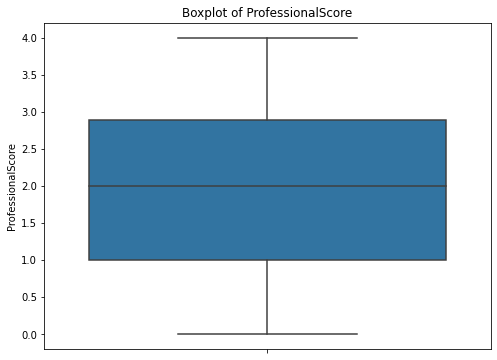

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#cau 1
# Tạo Box-plot cho cột 'ProfessionalScore'
plt.figure(figsize=(8, 6))
sns.boxplot(y='ProfessionalScore', data=df)

# Hiển thị biểu đồ
plt.title('Boxplot of ProfessionalScore')
plt.show()

In [8]:
import pandas as pd
import statsmodels.api as sm

# Giả định bạn có DataFrame df với các cột TimeToPlay (thời gian dành cho việc giải trí), TimeToStudy (thời gian dành cho việc học) và ProfessionalScore (điểm đánh giá năng lực)

# Xác định biến độc lập (thời gian học và thời gian giải trí) và biến phụ thuộc (điểm đánh giá năng lực)
X = df[['TimeToPlay', 'TimeToStudy']]
X = sm.add_constant(X)  # Thêm hệ số chặn (constant)
y = df['ProfessionalScore']

# Tạo mô hình hồi quy tuyến tính
model = sm.OLS(y, X).fit()

# Hiển thị kết quả phân tích hồi quy
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      ProfessionalScore   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.253
Date:                Sat, 12 Oct 2024   Prob (F-statistic):              0.286
Time:                        01:29:44   Log-Likelihood:                -1550.3
No. Observations:                1000   AIC:                             3107.
Df Residuals:                     997   BIC:                             3121.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.8134      0.096     18.860      

In [9]:
import pandas as pd
from scipy import stats

# Giả định bạn có DataFrame df với các cột 'TimeToPlay', 'TimeToStudy', 'Sexuality', và 'InterviewScore'

# Lọc dữ liệu theo nhóm Sexuality = 'T' và InterviewScore = 'B'
filtered_data = df[(df['Sexuality'] == 'T') & (df['InterviewScore'] == 'B')]

# Kiểm định t-test cho TimeToPlay và TimeToStudy
t_stat, p_value = stats.ttest_ind(filtered_data['TimeToPlay'], filtered_data['TimeToStudy'])

# In kết quả p-value
print(f'P-value: {p_value}')

P-value: 0.42667670534192237


In [10]:
import pandas as pd

# Giả định bạn đã có DataFrame df chứa cột TimeToStudy

# Chia TimeToStudy thành các khoảng và gán nhãn
bins = [0, 5, 7, 9, float('Inf')]
labels = ['Bad', 'Pretty', 'Good', 'Excellent']
df['StudyGroup'] = pd.cut(df['TimeToStudy'], bins=bins, labels=labels, right=False)

# Đếm số lượng phần tử thuộc nhóm "Good"
good_count = df['StudyGroup'].value_counts()['Good']
print(f'Số lượng phần tử thuộc nhóm Good: {good_count}')

Số lượng phần tử thuộc nhóm Good: 201


In [11]:
import pandas as pd

# Giả định bạn đã có DataFrame df

# Hiển thị kích thước của dữ liệu
data_shape = df.shape
print(f'Kích thước của dữ liệu: {data_shape}')

Kích thước của dữ liệu: (1000, 9)


In [12]:
import pandas as pd

# Giả định bạn đã có DataFrame df chứa cột TimeToStudy
# Tìm giá trị lớn nhất và nhỏ nhất trong TimeToStudy
min_value = df['TimeToStudy'].min()
max_value = df['TimeToStudy'].max()

# Số bin
bins = 20

# Tính độ rộng của mỗi bin
bin_width = (max_value - min_value) / bins
print(f'Độ rộng của mỗi bin là: {bin_width}')

Độ rộng của mỗi bin là: 0.5


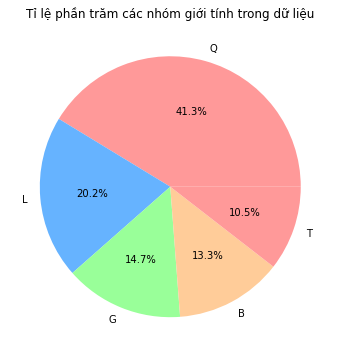

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả định bạn đã có DataFrame df với cột 'Sexuality' chứa các nhóm giới tính

# Tính toán tỉ lệ phần trăm của từng nhóm giới tính
gender_counts = df['Sexuality'].value_counts(normalize=True) * 100

# Tạo biểu đồ Pie
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Tỉ lệ phần trăm các nhóm giới tính trong dữ liệu')
plt.show()

In [14]:
import pandas as pd

# Giả định bạn đã có DataFrame df với các cột 'Sexuality' và 'ProfessionalScore'

# Tính trung bình điểm đánh giá năng lực của tất cả sinh viên
overall_mean_score = df['ProfessionalScore'].mean()

# Tính trung bình điểm đánh giá năng lực cho từng nhóm xu hướng tính dục
grouped_scores = df.groupby('Sexuality')['ProfessionalScore'].mean()

# Lọc ra các nhóm có trung bình điểm đánh giá năng lực lớn hơn trung bình chung
higher_than_average = grouped_scores[grouped_scores > overall_mean_score]

# Hiển thị kết quả
print("Những nhóm xu hướng tính dục có điểm đánh giá năng lực lớn hơn trung bình:")
print(higher_than_average)

Những nhóm xu hướng tính dục có điểm đánh giá năng lực lớn hơn trung bình:
Sexuality
B    2.025564
Q    1.960533
Name: ProfessionalScore, dtype: float64


In [16]:
import pandas as pd

# Giả định bạn có DataFrame df với cột 'ProfessionalScore'
Q1 = df['ProfessionalScore'].quantile(0.25)
Q3 = df['ProfessionalScore'].quantile(0.75)
IQR = Q3 - Q1

# Tính khoảng dữ liệu nghi ngờ bất thường
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Khoảng dữ liệu nghi ngờ bất thường: ({lower_bound}, {upper_bound})')

Khoảng dữ liệu nghi ngờ bất thường: (-1.8499999999999996, 5.75)


In [17]:
# Chia cột ProfessionalScore thành các khoảng phân vị
bins = [0, 0.2, 0.5, 0.6, 0.8, 1]
labels = ['A', 'B', 'C', 'D', 'E']

# Sử dụng phân vị để chia các nhóm
df['ScoreGroup'] = pd.qcut(df['ProfessionalScore'].rank(pct=True), q=bins, labels=labels)

# Kiểm tra giá trị ProfessionalScore = 2.7 thuộc nhóm nào
score_group = df.loc[df['ProfessionalScore'] == 2.7, 'ScoreGroup'].values[0]
print(f'ProfessionalScore = 2.7 thuộc nhóm: {score_group}')

ProfessionalScore = 2.7 thuộc nhóm: D


In [18]:
import scipy.stats as stats

# Giả sử bạn đã có DataFrame df chứa cột 'ProfessionalScore'

# Trung bình giả định cần kiểm tra là 2.4575
mu_test = 2.4575

# Thực hiện kiểm định t-test một mẫu
t_stat, p_value = stats.ttest_1samp(df['ProfessionalScore'], mu_test)

# In kết quả
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: -14.333435926932262, P-value: 1.634730670328841e-42


In [21]:
import pandas as pd
from scipy.stats import chi2_contingency

# Giả sử bạn đã có DataFrame df với các cột 'InterviewResult' (Kết quả phỏng vấn) và 'Sexuality' (Xu hướng tính dục)

# Tạo bảng phân phối chéo giữa Kết quả phỏng vấn và Xu hướng tính dục
crosstab = pd.crosstab(df['InterviewScore'], df['Sexuality'])

# Thực hiện kiểm định Chi-square
chi2_stat, p_value, dof, expected = chi2_contingency(crosstab)

# In kết quả
print(f'Chi-square statistic: {chi2_stat}, P-value: {p_value}')

Chi-square statistic: 8.569523652470142, P-value: 0.9300780652577139


In [26]:
import statsmodels.api as sm
import pandas as pd

# Giả sử bạn đã có DataFrame df chứa các cột TimeToStudy, TimeToRest, và ProfessionalScore

# Tạo biến độc lập (thời gian tự học và thời gian nghỉ ngơi)
X = df[['TimeToStudy', 'TimeToPlay']]

# Thêm hằng số vào mô hình
X = sm.add_constant(X)  # Thêm hệ số chặn (intercept)

# Biến phụ thuộc (điểm đánh giá năng lực)
y = df['ProfessionalScore']

# Huấn luyện mô hình hồi quy tuyến tính
model = sm.OLS(y, X).fit()

# Hiển thị tóm tắt kết quả hồi quy
print(model.summary())

# Thời gian tự học và nghỉ để dự đoán
time_to_study = 5.0
time_to_rest = 7.0

# Dự đoán điểm đánh giá năng lực dựa trên giá trị đã cho
predicted_score = model.predict([1, time_to_study, time_to_rest])  # [1] cho hệ số chặn (constant)
print(f'Điểm đánh giá năng lực dự đoán: {predicted_score[0]}')

                            OLS Regression Results                            
Dep. Variable:      ProfessionalScore   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.253
Date:                Sat, 12 Oct 2024   Prob (F-statistic):              0.286
Time:                        02:11:50   Log-Likelihood:                -1550.3
No. Observations:                1000   AIC:                             3107.
Df Residuals:                     997   BIC:                             3121.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.8134      0.096     18.860      

In [24]:
# Tính phân vị thứ 75 của cột ProfessionalScore
q3_value = df['ProfessionalScore'].quantile(0.75)
print(f'25% số sinh viên có điểm đánh giá năng lực cao hơn {q3_value}')

25% số sinh viên có điểm đánh giá năng lực cao hơn 2.9


In [27]:
import pandas as pd

# Giả sử bạn có DataFrame df với cột 'Sexuality' (Xu hướng tính dục) và 'InterviewScore' (Điểm phỏng vấn)

# Tạo bảng crosstab giữa Xu hướng tính dục và Điểm phỏng vấn
crosstab = pd.crosstab(df['Sexuality'], df['InterviewScore'])

# Tìm giá trị nhỏ nhất trong bảng Crosstab
min_value = crosstab.min().min()  # Tìm giá trị nhỏ nhất
min_group = crosstab[crosstab == min_value].stack().index[0]  # Nhóm chứa giá trị nhỏ nhất

# In kết quả
print(f'Giá trị nhỏ nhất trong crosstab thuộc nhóm: {min_group}')

# Tìm điểm phỏng vấn phổ biến nhất (mode) của sinh viên
most_common_interview_score = df['InterviewScore'].mode()[0]
print(f'Đa số điểm phỏng vấn của sinh viên là: {most_common_interview_score}')

Giá trị nhỏ nhất trong crosstab thuộc nhóm: ('B', 'A')
Đa số điểm phỏng vấn của sinh viên là: D
